# Tutorial

This tutorial shows the basic steps of using CyMorph to extract metrics from an image.

First we need to load `fit` image. 

In [3]:
# addtional libraries for data loading and manipulation
import astropy.io.fits as fits
import numpy as np

# image is from SDSS DR7 (objid=587725472806600764)
fits_file = fits.open('data/image.fit')
# all data arrays are np.float32
image = np.array(fits_file[0].data, np.float32)

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

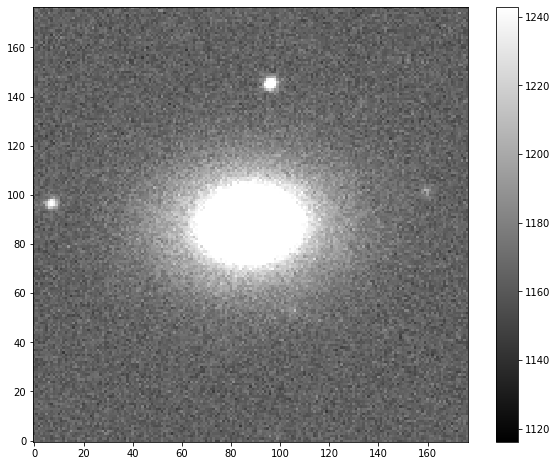

In [6]:
# show the image
m, s = np.mean(image), np.std(image)
plt.imshow(image, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

It is important to point that image should be preprocessed:
1. Cleaned - remove secondary objects
2. Recenter - baricenter of the target objet should match the central pixel of the image.
3. A segmented mask should be applied to assign 0 value for all the pixels that do not belong to the target object.

All these routines are not included in CyMorph code and is the end-user's responsibility. It is dictated by the fact that each survey is different in optics, resolution, and storage routines (sky subtraction, object identification, or even cleaning).

Here we will present basic methods to perform these steps. All steps will be heavily reling on `sep` package and its methods.

## Object identifying and Cleaning

In [29]:
import sep

bkg = sep.Background(image)
image_sub = image - bkg
objects, segmented_mask = sep.extract(image_sub, 1.5, err=bkg.globalrms, segmentation_map=True)

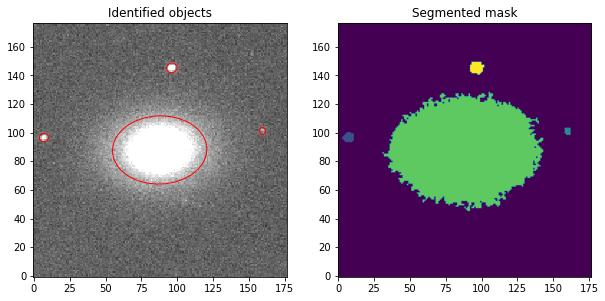

In [30]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots(1, 2)
m, s = np.mean(image_sub), np.std(image_sub)
ax[0].set_title('Identified objects')
im = ax[0].imshow(image_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=4*objects['a'][i],
                height=4*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax[0].add_artist(e)

ax[1].set_title('Segmented mask')
ax[1].imshow(segmented_mask, origin='lower') 

In [41]:
segmented_mask[segmented_mask==1] = 0
segmented_mask[segmented_mask==2] = 0
segmented_mask[segmented_mask==4] = 0

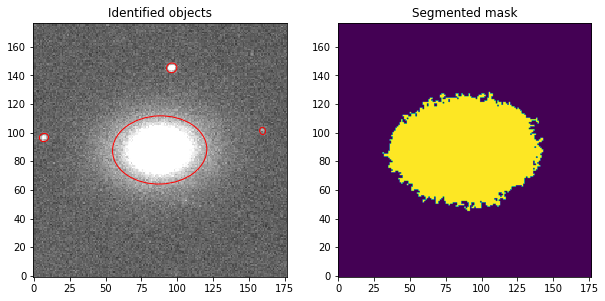

In [42]:
# plot background-subtracted image
fig, ax = plt.subplots(1, 2)
m, s = np.mean(image_sub), np.std(image_sub)
ax[0].set_title('Identified objects')
im = ax[0].imshow(image_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=4*objects['a'][i],
                height=4*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax[0].add_artist(e)

ax[1].set_title('Segmented mask')
ax[1].imshow(segmented_mask, origin='lower') 

In [43]:
segmented_image = image * segmented_mask

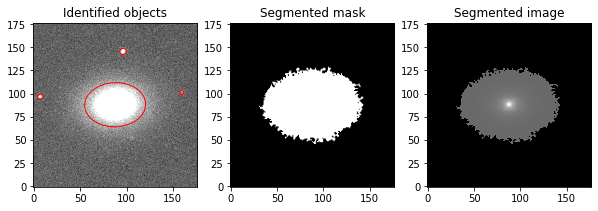

In [67]:
fig, ax = plt.subplots(1, 3)
m, s = np.mean(image_sub), np.std(image_sub)
ax[0].set_title('Identified objects')
im = ax[0].imshow(image_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=4*objects['a'][i],
                height=4*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax[0].add_artist(e)

ax[1].set_title('Segmented mask')
ax[1].imshow(segmented_mask, origin='lower',cmap='gray') 

ax[2].set_title('Segmented image')
m, s = np.mean(image_sub), np.std(image_sub)
ax[2].imshow(segmented_image, interpolation='nearest', cmap='gray',
              origin='lower')

In [ ]:
# ### Concentration
# ```
# from cymorph.concentration import Concentration
# c = Concentration(image, radius1, radius2) 
# c.get_concentration()